Время суток,Погода,Ландшафт,Разведка,Успех
День,Ясно,Равнина,Высокая,Высокий
День,Ясно,Равнина,Средняя,Высокий
День,Ясно,Равнина,Низкая,Низкий
День,Пасмурно,Равнина,Высокая,Высокий
День,Дождь,Горы,Высокая,Средний
День,Шторм,Горы,Высокая,Низкий
День,Пасмурно,Равнина,Низкая,Низкий
День,Дождь,Равнина,Высокая,Высокий
День,Ясно,Лес,Низкая,Низкий
День,Ясно,Лес,Высокая,Средний


Признак,Прирост информации
Разведка,0.1771
Погода,0.1314
Ландшафт,0.1187
Время суток,0.0485


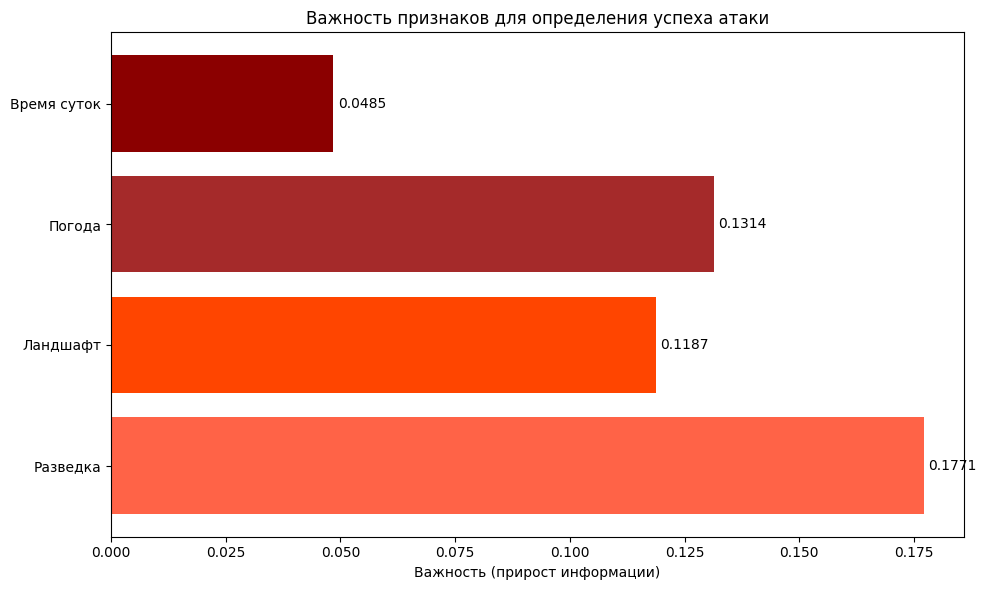

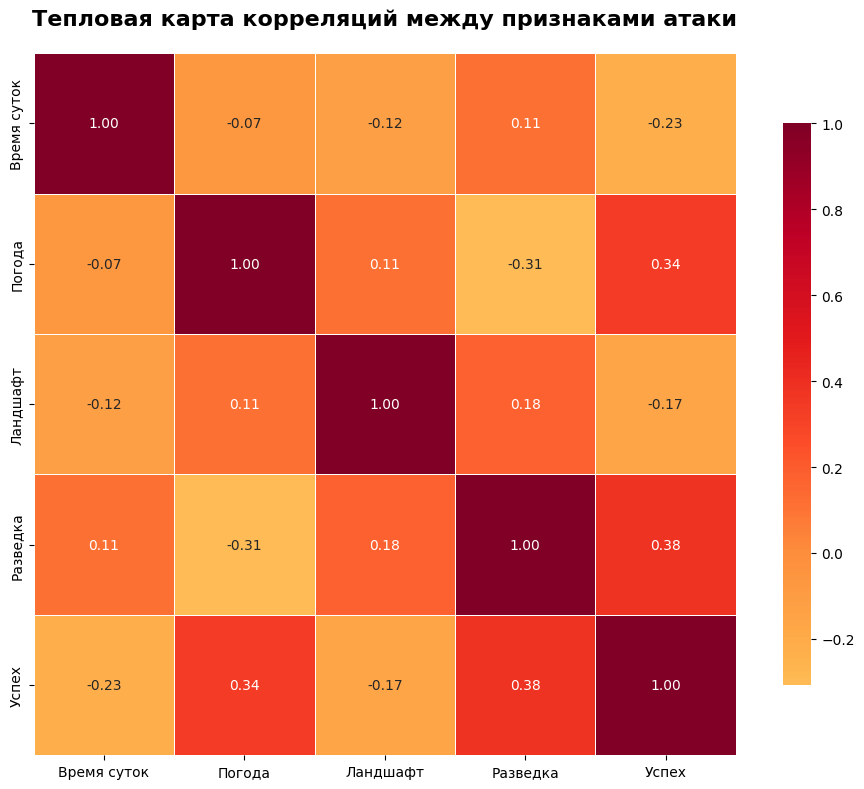

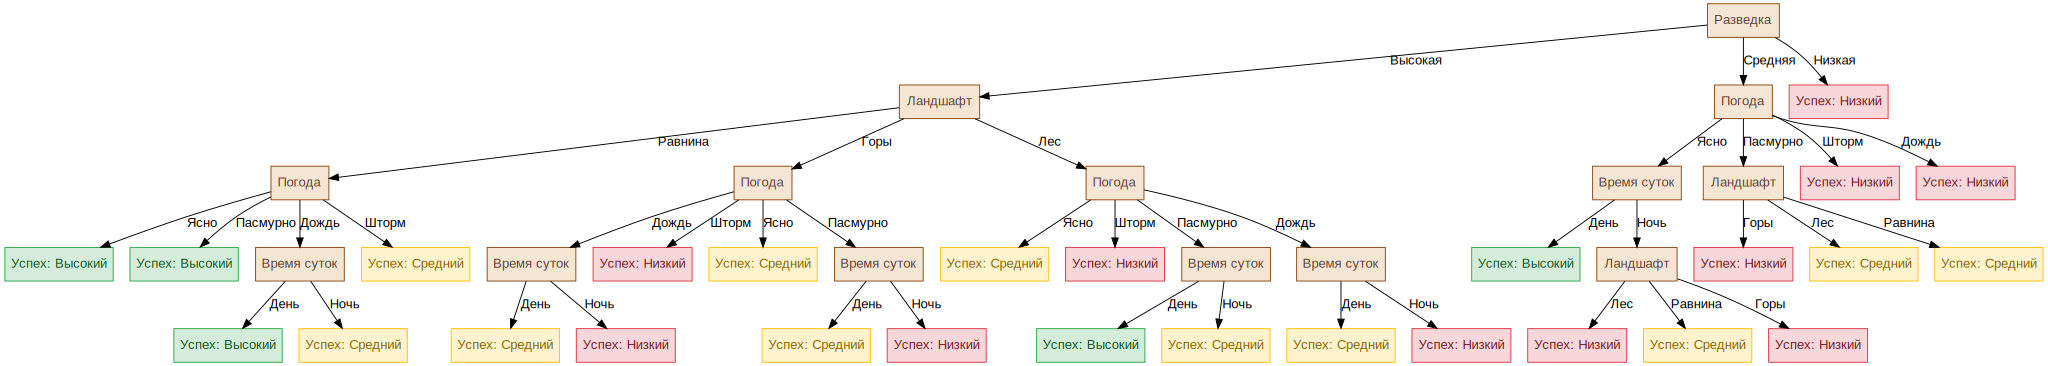

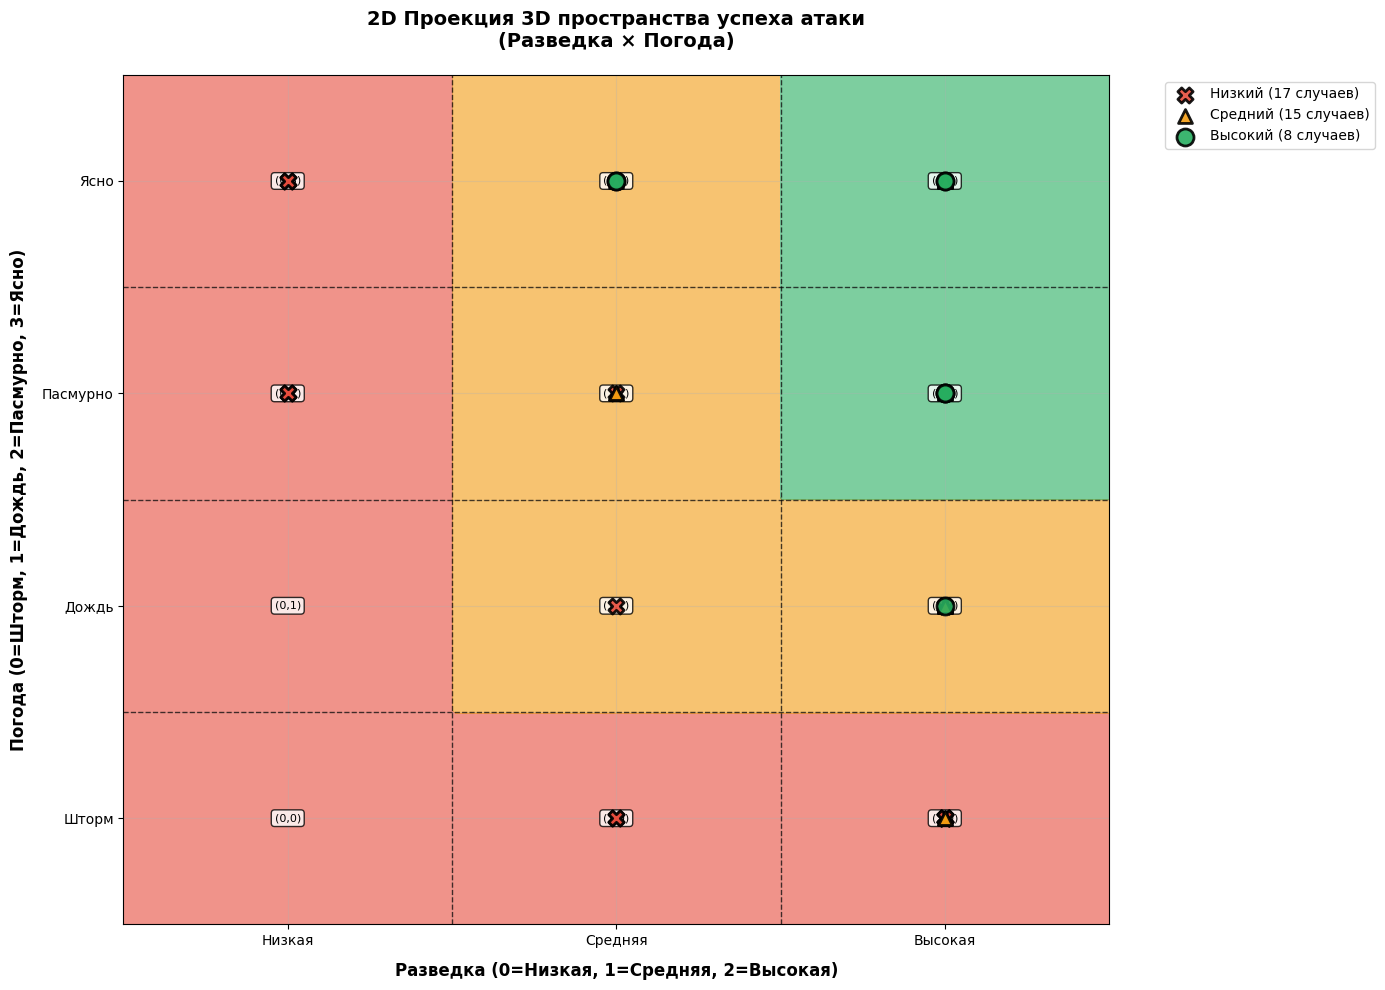

,Параметры,Фактический,Предсказанный,Статус
0,"День, Ясно, Равнина",Высокий,Высокий,Верно
1,"День, Ясно, Равнина",Высокий,Высокий,Верно
2,"День, Ясно, Равнина",Низкий,Низкий,Верно
3,"День, Пасмурно, Равнина",Высокий,Высокий,Верно
4,"День, Дождь, Горы",Средний,Средний,Верно
5,"День, Шторм, Горы",Низкий,Низкий,Верно
6,"День, Пасмурно, Равнина",Низкий,Низкий,Верно
7,"День, Дождь, Равнина",Высокий,Высокий,Верно
8,"День, Ясно, Лес",Низкий,Низкий,Верно
9,"День, Ясно, Лес",Средний,Средний,Верно


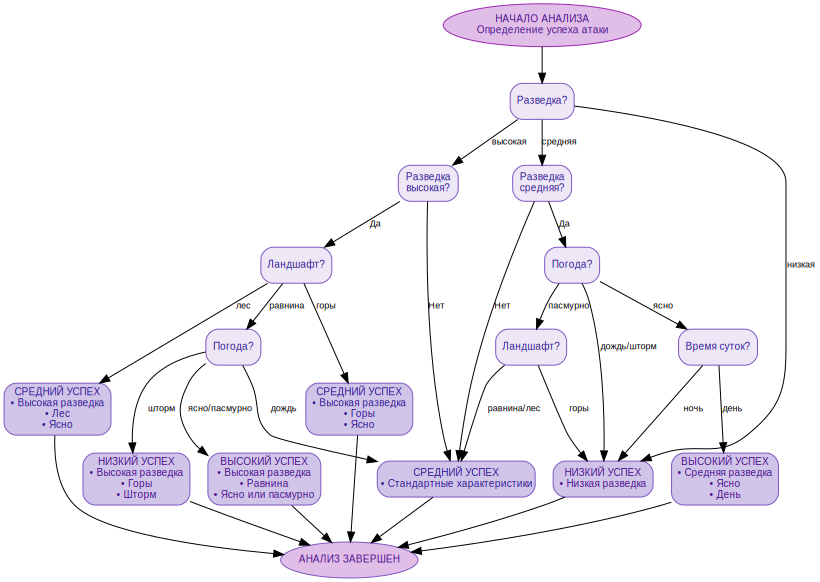

In [ ]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from IPython.display import HTML, display, Image
from graphviz import Digraph
from anytree import Node
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
def create_attack_success_dataset():
    """Создает датасет успеха атаки"""
    time_map = {'Д': 'День', 'Н': 'Ночь'}
    weather_map = {'Я': 'Ясно', 'П': 'Пасмурно', 'Д': 'Дождь', 'Ш': 'Шторм'}
    land_map = {'Р': 'Равнина', 'Г': 'Горы', 'Л': 'Лес'}
    recon_map = {'В': 'Высокая', 'С': 'Средняя', 'Н': 'Низкая'}
    succ_map = {'В': 'Высокий', 'С': 'Средний', 'Н': 'Низкий'}
    data_abbrev = [
        ['Д', 'Я', 'Р', 'В', 'В'],
        ['Д', 'Я', 'Р', 'С', 'В'],
        ['Д', 'Я', 'Р', 'Н', 'Н'],
        ['Д', 'П', 'Р', 'В', 'В'],
        ['Д', 'Д', 'Г', 'В', 'С'],
        ['Д', 'Ш', 'Г', 'В', 'Н'],
        ['Д', 'П', 'Р', 'Н', 'Н'],
        ['Д', 'Д', 'Р', 'В', 'В'],
        ['Д', 'Я', 'Л', 'Н', 'Н'],
        ['Д', 'Я', 'Л', 'В', 'С'],
        ['Д', 'Ш', 'Л', 'В', 'Н'],
        ['Д', 'П', 'Г', 'С', 'Н'],
        ['Д', 'Я', 'Л', 'С', 'В'],
        ['Д', 'Я', 'Г', 'В', 'С'],
        ['Д', 'Ш', 'Р', 'В', 'С'],
        ['Д', 'П', 'Л', 'В', 'В'],
        ['Д', 'П', 'Л', 'С', 'С'],
        ['Д', 'П', 'Г', 'В', 'С'],
        ['Д', 'Д', 'Л', 'В', 'С'],
        ['Д', 'Ш', 'Р', 'С', 'Н'],
        ['Н', 'Я', 'Р', 'В', 'В'],
        ['Н', 'Я', 'Г', 'В', 'С'],
        ['Н', 'Я', 'Л', 'С', 'Н'],
        ['Н', 'Я', 'Л', 'В', 'С'],
        ['Н', 'Ш', 'Р', 'В', 'С'],
        ['Н', 'Ш', 'Р', 'С', 'Н'],
        ['Н', 'Д', 'Р', 'С', 'Н'],
        ['Н', 'Д', 'Г', 'В', 'Н'],
        ['Н', 'Д', 'Л', 'В', 'Н'],
        ['Н', 'П', 'Р', 'В', 'В'],
        ['Н', 'П', 'Р', 'С', 'С'],
        ['Н', 'П', 'Р', 'Н', 'Н'],
        ['Н', 'П', 'Г', 'В', 'Н'],
        ['Н', 'П', 'Л', 'В', 'С'],
        ['Н', 'Ш', 'Г', 'В', 'Н'],
        ['Н', 'Я', 'Р', 'С', 'С'],
        ['Н', 'Д', 'Р', 'В', 'С'],
        ['Н', 'Ш', 'Л', 'В', 'Н'],
        ['Н', 'Я', 'Г', 'С', 'Н'],
        ['Н', 'Д', 'Р', 'В', 'С']
    ]
    data = {
        'Время суток': [time_map[x[0]] for x in data_abbrev],
        'Погода': [weather_map[x[1]] for x in data_abbrev],
        'Ландшафт': [land_map[x[2]] for x in data_abbrev],
        'Разведка': [recon_map[x[3]] for x in data_abbrev],
        'Успех': [succ_map[x[4]] for x in data_abbrev]
    }
    return pd.DataFrame(data)
df = create_attack_success_dataset()
# =============================================================================
# 1.1 Красивое отображение таблицы
# =============================================================================
display(HTML("""
<style>
    .simple-table {
        border-collapse: collapse;
        width: 100%;
        margin: 15px 0;
        font-family: Arial, sans-serif;
    }
    .simple-table th {
        background-color: #8B0000;
        color: white;
        padding: 12px;
        text-align: left;
        font-weight: bold;
    }
    .simple-table td {
        padding: 10px;
        border-bottom: 1px solid #ddd;
    }
    .simple-table tr:hover { background-color: #f5f5f5; }
    .high { background-color: #d4edda !important; }
    .medium { background-color: #fff3cd !important; }
    .low { background-color: #ffeaea !important; }
</style>
"""))
display(HTML("<h2 style='color: #8B0000; text-align: center;'> Анализ успеха атаки</h2>"))
def style_success(val):
    if val == 'Высокий': return 'high'
    elif val == 'Средний': return 'medium'
    elif val == 'Низкий': return 'low'
    return ''
styled_df = df.copy()
styled_html = styled_df.to_html(classes='simple-table', index=False, escape=False)
for success in ['Высокий', 'Средний', 'Низкий']:
    styled_html = styled_html.replace(f'>{success}<', f' class="{style_success(success)}">{success}<')
display(HTML(styled_html))
# =============================================================================
# 2. РАСЧЕТ ИСХОДОВ БЕЗ АЛГОРИТМА ID3
# =============================================================================
def calculate_max_outcomes_attack():
    """Рассчитывает максимальное количество возможных исходов без ID3"""
    time_options = len(df['Время суток'].unique())
    weather_options = len(df['Погода'].unique())
    land_options = len(df['Ландшафт'].unique())
    recon_options = len(df['Разведка'].unique())
    max_outcomes = time_options * weather_options * land_options * recon_options
    return max_outcomes
max_possible_outcomes = calculate_max_outcomes_attack()
# display(HTML(f"""
# <div style='background: linear-gradient(135deg, #8B0000 0%, #FF4500 100%); padding: 20px; border-radius: 10px; color: white; margin: 20px 0;'>
#     <h3 style='margin: 0;'>📈 Расчет максимального количества исходов для атаки</h3>
# </div>
# <div style='background: #f8f9fa; padding: 15px; border-radius: 5px; border-left: 5px solid #8B0000;'>
#     <p><strong>Без алгоритма ID3 нам потребовалось бы рассмотреть все возможные комбинации:</strong></p>
#     <p>🕒 Время суток ({len(df['Время суток'].unique())}) × 🌤️ Погода ({len(df['Погода'].unique())}) × 🏞️ Ландшафт ({len(df['Ландшафт'].unique())}) × 🕵️ Разведка ({len(df['Разведка'].unique())})</p>
#     <h4 style='color: #e74c3c;'>Максимальное количество листьев в дереве: <strong>{max_possible_outcomes}</strong></h4>
# </div>
# """))
# =============================================================================
# 3. Реализация ID3
# =============================================================================
class AttackSuccessID3:
    def __init__(self):
        self.tree = None
        self.features = ['Время суток', 'Погода', 'Ландшафт', 'Разведка']
        self.target = 'Успех'
    def entropy(self, probabilities):
        return -sum(p * math.log2(p) for p in probabilities if p > 0)
    def calculate_entropy(self, data):
        target_counts = Counter(data[self.target])
        total = len(data)
        probabilities = [count / total for count in target_counts.values()]
        return self.entropy(probabilities)
    def information_gain(self, data, feature):
        total_entropy = self.calculate_entropy(data)
        weighted_entropy = 0
        for value in data[feature].unique():
            subset = data[data[feature] == value]
            weighted_entropy += len(subset)/len(data) * self.calculate_entropy(subset)
        return total_entropy - weighted_entropy
    def find_best_feature(self, data, features):
        best_gain = -1
        best_feature = None
        for feature in features:
            gain = self.information_gain(data, feature)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
        return best_feature
    def build_tree(self, data, features, depth=0, max_depth=4):
        if len(data[self.target].unique()) == 1:
            return Node(f"Успех: {data[self.target].iloc[0]}", feature=None, value=None, is_leaf=True)
        if len(features) == 0 or depth >= max_depth:
            most_common = data[self.target].mode()[0]
            return Node(f"Успех: {most_common}", feature=None, value=None, is_leaf=True)
        best_feature = self.find_best_feature(data, features)
        node = Node(best_feature, feature=best_feature, is_leaf=False)
        remaining_features = [f for f in features if f != best_feature]
        for value in data[best_feature].unique():
            subset = data[data[best_feature] == value]
            if len(subset) == 0:
                most_common = data[self.target].mode()[0]
                Node(f"Успех: {most_common}", parent=node, feature=None, value=value, is_leaf=True)
            else:
                child = self.build_tree(subset, remaining_features, depth+1, max_depth)
                child.parent = node
                child.value = value
        return node
    def fit(self, data):
        self.tree = self.build_tree(data, self.features)
        return self.tree
    def count_leaves(self, node=None):
        if node is None:
            node = self.tree
        if hasattr(node, 'is_leaf') and node.is_leaf:
            return 1
        return sum(self.count_leaves(child) for child in node.children)
    def visualize_tree(self):
        if self.tree is None:
            print("Дерево не построено!")
            return None
        dot = Digraph(comment='Дерево решений успеха атаки ID3')
        dot.attr('node', shape='box', style='filled', fontname='Arial')
        dot.attr('edge', fontname='Arial')
        def add_nodes_edges(node, parent_id=None, edge_label=""):
            if node is None: return
            node_id = str(id(node))
            if hasattr(node, 'is_leaf') and node.is_leaf:
                if 'Высокий' in node.name: color,text_color,border_color = '#d4edda','#155724','#28a745'
                elif 'Средний' in node.name: color,text_color,border_color = '#fff3cd','#856404','#ffc107'
                else: color,text_color,border_color = '#f8d7da','#721c24','#dc3545'
                dot.node(node_id, f"{node.name}", fillcolor=color, color=border_color, fontcolor=text_color)
            else:
                dot.node(node_id, f"{node.name}", fillcolor='#f5e6d3', color='#8B4513', fontcolor='#5D4037')
            if parent_id is not None: dot.edge(parent_id, node_id, label=edge_label)
            if hasattr(node, 'children'):
                for child in node.children:
                    edge_label = getattr(child, 'value', '') or ""
                    add_nodes_edges(child, node_id, edge_label)
        add_nodes_edges(self.tree)
        return dot
# =============================================================================
# 4. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ
# =============================================================================
# display(HTML("""
# <div style='background: linear-gradient(135deg, #A52A2A 0%, #8B0000 100%); padding: 20px; border-radius: 10px; color: white; margin: 20px 0;'>
#     <h3 style='margin: 0;'>📊 Анализ важности признаков</h3>
# </div>
# """))
# Создаем временный экземпляр для анализа
temp_tree = AttackSuccessID3()
def analyze_features_importance(data, target='Успех'):
    features = ['Время суток', 'Погода', 'Ландшафт', 'Разведка']
    results = []
    # Рассчитываем энтропию всего набора данных
    total_entropy = temp_tree.calculate_entropy(data)
    for feature in features:
        gain = temp_tree.information_gain(data, feature)
        results.append({
            'Признак': feature,
            'Прирост информации': round(gain, 4),
        })
    return pd.DataFrame(results)
# Анализируем важность признаков
importance_df = analyze_features_importance(df)
# Красивое отображение таблицы важности признаков
styled_importance = importance_df.sort_values('Прирост информации', ascending=False)
styled_importance_html = styled_importance.to_html(classes='simple-table', index=False, escape=False)
display(HTML(styled_importance_html))
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
colors = ['#8B0000', '#A52A2A', '#FF4500', '#FF6347']
bars = plt.barh(importance_df['Признак'], importance_df['Прирост информации'], color=colors)
plt.xlabel('Важность (прирост информации)')
plt.title('Важность признаков для определения успеха атаки')
plt.gca().invert_yaxis()
# Добавляем значения на столбцы
for bar, value in zip(bars, importance_df['Прирост информации']):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{value:.4f}', ha='left', va='center')
plt.tight_layout()
plt.show()
# =============================================================================
# 5. ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ ДЛЯ АТАКИ
# =============================================================================
def create_correlation_heatmap_attack(data):
    """Создает тепловую карту корреляций для успеха атаки"""
    # display(HTML("""
    # <div style='background: linear-gradient(135deg, #8B0000 0%, #FF4500 100%); padding: 20px; border-radius: 10px; color: white; margin: 20px 0;'>
    #     <h3 style='margin: 0;'>🎨 Тепловая карта корреляций для атаки</h3>
    # </div>
    # """))
    # Создаем копию данных для преобразования
    plot_data = data.copy()
    # Преобразуем категориальные признаки в числовые
    time_map = {'День': 0, 'Ночь': 1}
    weather_map = {'Шторм': 0, 'Дождь': 1, 'Пасмурно': 2, 'Ясно': 3}
    land_map = {'Равнина': 0, 'Горы': 1, 'Лес': 2}
    recon_map = {'Низкая': 0, 'Средняя': 1, 'Высокая': 2}
    success_map = {'Низкий': 0, 'Средний': 1, 'Высокий': 2}
    numeric_data = pd.DataFrame()
    numeric_data['Время суток'] = plot_data['Время суток'].map(time_map)
    numeric_data['Погода'] = plot_data['Погода'].map(weather_map)
    numeric_data['Ландшафт'] = plot_data['Ландшафт'].map(land_map)
    numeric_data['Разведка'] = plot_data['Разведка'].map(recon_map)
    numeric_data['Успех'] = plot_data['Успех'].map(success_map)
    # Убедимся, что все данные числовые
    numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce').dropna()
    correlation_matrix = numeric_data.corr()
    # Создаем тепловую карту
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='YlOrRd',
                center=0,
                fmt='.2f',
                linewidths=0.5,
                square=True,
                cbar_kws={'shrink': 0.8})
    plt.title('Тепловая карта корреляций между признаками атаки', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
# Запускаем тепловую карту для атаки
create_correlation_heatmap_attack(df)
# =============================================================================
# 7. ПОСТРОЕНИЕ И ВИЗУАЛИЗАЦИЯ ДЕРЕВА
# =============================================================================
# Строим дерево на данных
attack_tree = AttackSuccessID3()
attack_tree.fit(df)
# Графическое представление дерева
dot = attack_tree.visualize_tree()
if dot:
    # Отображаем дерево
    try:
        display(dot)
    except Exception as e:
        print("Графическое отображение недоступно:", e)
# =============================================================================
# 8. ЛОГИЧЕСКИЕ ПРАВИЛА ИЗ ДЕРЕВА (ОБЪЕДИНЕННЫЕ)
# =============================================================================
def extract_rules_from_tree_attack(tree):
    """Извлекает логические правила из дерева решений и объединяет их по успеху"""
    if tree.tree is None:
        return {}
    rules_dict = {
        'Высокий': [],
        'Средний': [],
        'Низкий': []
    }
    def traverse(node, current_rule=[]):
        if hasattr(node, 'is_leaf') and node.is_leaf:
            # Нашли лист - извлекаем успех и правила
            success = None
            if 'Высокий' in node.name:
                success = 'Высокий'
            elif 'Средний' in node.name:
                success = 'Средний'
            elif 'Низкий' in node.name:
                success = 'Низкий'
            if success and current_rule:
                rules_dict[success].append(current_rule)
        else:
            # Внутренний узел - продолжаем обход
            if hasattr(node, 'children'):
                for child in node.children:
                    condition = f"{node.name} = {getattr(child, 'value', '')}"
                    traverse(child, current_rule + [condition])
    traverse(tree.tree)
    # Объединяем правила для каждого успеха
    combined_rules = {}
    for success, rules_list in rules_dict.items():
        if rules_list:
            # Группируем условия по признакам
            conditions_by_feature = {}
            for rule in rules_list:
                for condition in rule:
                    feature = condition.split(' = ')[0]
                    if feature not in conditions_by_feature:
                        conditions_by_feature[feature] = set()
                    value = condition.split(' = ')[1]
                    conditions_by_feature[feature].add(value)
            # Формируем объединенное выражение
            combined_conditions = []
            for feature, values in conditions_by_feature.items():
                if len(values) == 1:
                    combined_conditions.append(f"{feature} = {list(values)[0]}")
                else:
                    value_conditions = [f"{feature} = {val}" for val in values]
                    combined_conditions.append(f"({' ИЛИ '.join(value_conditions)})")
            combined_rules[success] = ' И '.join(combined_conditions)
        else:
            combined_rules[success] = "Не найдено правил"
    return combined_rules
def interpret_attack_tree_combined(tree):
    """Интерпретирует дерево и выводит объединенные правила"""
    rules = extract_rules_from_tree_attack(tree)
    rules_html = "<div style='background: #f8f9fa; padding: 20px; border-radius: 5px;'>"
    for success, rule in rules.items():
        if success == 'Высокий':
            color = "#27ae60"
            emoji = "✅"
            bg_color = "#d4edda"
        elif success == 'Средний':
            color = "#f39c12"
            emoji = "🟡"
            bg_color = "#fff3cd"
        else:
            color = "#e74c3c"
            emoji = "❌"
            bg_color = "#f8d7da"
        rules_html += f"""
        <div style='margin: 15px 0; padding: 20px; border-radius: 8px; border-left: 5px solid {color}; background: {bg_color};'>
            <h4 style='color: {color}; margin: 0 0 15px 0; font-size: 18px;'>{success.upper()} УСПЕХ:</h4>
            <div style='background: white; padding: 15px; border-radius: 5px; border: 1px solid {color};'>
                <strong style='color: #2c3e50; font-size: 16px;'>{rule}</strong>
            </div>
        </div>
        """
    rules_html += "</div>"
    display(HTML(rules_html))
# Анализируем дерево с объединенными правилами
interpret_attack_tree_combined(attack_tree)
# =============================================================================
# 9. ЭФФЕКТИВНОСТЬ АЛГОРИТМА С КПД
# =============================================================================
# Расчет эффективности
actual_leaves = attack_tree.count_leaves()
efficiency = (1 - actual_leaves / max_possible_outcomes) * 100
kpd = (max_possible_outcomes / actual_leaves) * 100 # КПД как отношение использованных листьев к максимальным
# display(HTML(f"""
# <div style='display: grid; grid-template-columns: 1fr 1fr; gap: 20px; margin: 20px 0;'>
#     <div style='background: #fff3cd; padding: 15px; border-radius: 5px; border-left: 5px solid #ffc107;'>
#         <h4 style='color: #856404;'>📈 Без алгоритма ID3</h4>
#         <p style='font-size: 24px; font-weight: bold; color: #e74c3c;'>{max_possible_outcomes} листьев</p>
#         <p>Полное дерево со всеми комбинациями</p>
#     </div>
#     <div style='background: #d1ecf1; padding: 15px; border-radius: 5px; border-left: 5px solid #17a2b8;'>
#         <h4 style='color: #0c5460;'>🎯 С алгоритмом ID3</h4>
#         <p style='font-size: 24px; font-weight: bold; color: #27ae60;'>{actual_leaves} листьев</p>
#         <p>Оптимизированное дерево решений</p>
#     </div>
# </div>
# <div style='background: #e3f2fd; padding: 15px; border-radius: 5px; border-left: 5px solid #2196f3; margin: 20px 0;'>
#     <ul>
#         <li><strong>Эффективность сжатия {efficiency:.1f}%</strong> </li>
#         <li><strong>КПД {kpd:.1f}%</strong></li>
#     </ul>
# </div>
# """))
# =============================================================================
# 12.1 ЛИНЕЙНЫЕ РАЗДЕЛЯЮЩИЕ ПРАВИЛА ДЛЯ АТАКИ
# =============================================================================
# =============================================================================
# ИСПРАВЛЕННАЯ ТЕПЛОВАЯ КАРТА - ПРОЕКЦИЯ 3D С ОБЛАСТЯМИ
# =============================================================================
def create_attack_linear_rules_as_projection():
    """Создает тепловую карту как проекцию 3D с уравнениями областей для атаки"""
    display(HTML("""
    <div style='background: linear-gradient(135deg, #8B0000 0%, #FF4500 100%); padding: 20px; border-radius: 10px; color: white; margin: 20px 0;'>
        <h3 style='margin: 0;'>2D Проекция областями успеха</h3>
    </div>
    """))
    # Создаем числовые представления из ИСХОДНОЙ таблицы
    df_numeric = df.copy()
    # Преобразуем категориальные признаки в числовые
    recon_map = {'Низкая': 0, 'Средняя': 1, 'Высокая': 2}
    weather_map = {'Шторм': 0, 'Дождь': 1, 'Пасмурно': 2, 'Ясно': 3}
    success_map = {'Низкий': 0, 'Средний': 1, 'Высокий': 2}
    df_numeric['Разведка_числ'] = df_numeric['Разведка'].map(recon_map)
    df_numeric['Погода_числ'] = df_numeric['Погода'].map(weather_map)
    df_numeric['Успех_числ'] = df_numeric['Успех'].map(success_map)
    # Создаем сетку для тепловой карты
    x_min, x_max = -0.5, 2.5 # Разведка (0-2)
    y_min, y_max = -0.5, 3.5 # Погода (0-3)
    x = np.linspace(x_min, x_max, 200)
    y = np.linspace(y_min, y_max, 200)
    X, Y = np.meshgrid(x, y)
    # ОПРЕДЕЛЯЕМ ОБЛАСТИ
    def get_success_from_3d_rules(x_val, y_val):
        """Определяет успех по правилам"""
        x_disc = max(0, min(2, int(round(x_val))))
        y_disc = max(0, min(3, int(round(y_val))))
        if x_disc == 2 and y_disc >= 2:
            return 2 # Высокий
        elif x_disc >= 1 and y_disc >= 1:
            return 1 # Средний
        else:
            return 0 # Низкий
    # Создаем матрицу классификации
    Z = np.zeros_like(X)
    for i in range(len(x)):
        for j in range(len(y)):
            x_val = X[i, j]
            y_val = Y[i, j]
            Z[i, j] = get_success_from_3d_rules(x_val, y_val)
    # Создаем график
    fig, ax = plt.subplots(figsize=(14, 10))
    # Цвета для успехов
    colors = ['#e74c3c', '#f39c12', '#27ae60']
    cmap = plt.cm.colors.ListedColormap(colors)
    # Тепловая карта с областями
    contour = ax.contourf(X, Y, Z, levels=[-0.5, 0.5, 1.5, 2.5], cmap=cmap, alpha=0.6)
    # Добавляем сетку
    for i in range(4): 
        ax.axvline(i - 0.5, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
    for i in range(5):
        ax.axhline(i - 0.5, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
    # Добавляем разделительные линии
    ax.axvline(0.5, color='black', linestyle='--', alpha=0.7, linewidth=1)
    ax.axvline(1.5, color='black', linestyle='--', alpha=0.7, linewidth=1)
    ax.axhline(0.5, color='black', linestyle='--', alpha=0.7, linewidth=1)
    ax.axhline(1.5, color='black', linestyle='--', alpha=0.7, linewidth=1)
    ax.axhline(2.5, color='black', linestyle='--', alpha=0.7, linewidth=1)
    # Добавляем исходные точки данных
    successes = ['Низкий', 'Средний', 'Высокий']
    markers = ['X', '^', 'o']
    sizes = [120, 100, 150]
    for i, success in enumerate(successes):
        mask = df_numeric['Успех'] == success
        subset = df_numeric[mask]
        if len(subset) > 0:
            ax.scatter(subset['Разведка_числ'], subset['Погода_числ'],
                      c=colors[i], marker=markers[i], s=sizes[i],
                      edgecolors='black', linewidth=2,
                      label=f'{success} ({len(subset)} случаев)',
                      alpha=0.9, zorder=5)
    # Настройка графика
    ax.set_xlabel('Разведка (0=Низкая, 1=Средняя, 2=Высокая)',
                  fontsize=12, fontweight='bold', labelpad=10)
    ax.set_ylabel('Погода (0=Шторм, 1=Дождь, 2=Пасмурно, 3=Ясно)',
                  fontsize=12, fontweight='bold', labelpad=10)
    ax.set_title('2D Проекция 3D пространства успеха атаки\n(Разведка × Погода)',
                 fontsize=14, fontweight='bold', pad=20)
    # Устанавливаем метки осей
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Низкая', 'Средняя', 'Высокая'], fontsize=10)
    ax.set_yticks([0, 1, 2, 3])
    ax.set_yticklabels(['Шторм', 'Дождь', 'Пасмурно', 'Ясно'], fontsize=10)
    # Устанавливаем пределы осей
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    # Основная сетка
    ax.grid(True, alpha=0.3, linestyle='-')
    # Легенда
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    # Добавляем координатную разметку
    for x_coord in [0, 1, 2]:
        for y_coord in [0, 1, 2, 3]:
            success_level = get_success_from_3d_rules(x_coord, y_coord)
            color = colors[success_level]
            ax.text(x_coord, y_coord, f'({x_coord},{y_coord})',
                   fontsize=8, ha='center', va='center',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.tight_layout()
    plt.show()
    # Вывод уравнений ОБЛАСТЕЙ
    areas_html = """
    <div style='background: #f8f9fa; padding: 20px; border-radius: 10px; border: 1px solid #ddd;'>
        <h4 style='color: #2c3e50; margin-bottom: 20px;'>Уравнения областей для каждого успеха атаки:</h4>

            <div style='background: #f8d7da; padding: 15px; border-radius: 5px; border: 2px solid #e74c3c;'>
                <h5 style=margin: 0 0 10px 0;'>ОБЛАСТЬ НИЗКОГО УСПЕХА:</h5>
                <div style='font-family: monospace; font-size: 14px; background: white; padding: 10px; border-radius: 3px; text-align: center;'>
                    <strong>0 ≤ x ≤ 2 AND 0 ≤ y ≤ 0 OR x = 0 AND y ≤ 3</strong>
                </div>
                <p style='margin: 10px 0 0 0; font-size: 12px; color: #666; text-align: center;'>
                Разведка: низкая<br>
                Погода: любая с низкой разведкой
                </p>
            </div>
            <div style='background: #fff3cd; padding: 15px; border-radius: 5px; border: 2px solid #f39c12;'>
                <h5 style=margin: 0 0 10px 0;'>ОБЛАСТЬ СРЕДНЕГО УСПЕХА:</h5>
                <div style='font-family: monospace; font-size: 14px; background: white; padding: 10px; border-radius: 3px; text-align: center;'>
                    <strong>1 ≤ x ≤ 2 AND 1 ≤ y ≤ 3 AND NOT (x = 2 AND y ≥ 2)</strong>
                </div>
                <p style='margin: 10px 0 0 0; font-size: 12px; color: #666; text-align: center;'>
                Разведка: средняя-высокая<br>
                Погода: дождь-ясно
                </p>
            </div>
            <div style='background: #d4edda; padding: 15px; border-radius: 5px; border: 2px solid #27ae60;'>
                <h5 style='margin: 0 0 10px 0;'>ОБЛАСТЬ ВЫСОКОГО УСПЕХА:</h5>
                <div style='font-family: monospace; font-size: 14px; background: white; padding: 10px; border-radius: 3px; text-align: center;'>
                    <strong>x = 2 AND y ≥ 2</strong>
                </div>
                <p style='margin: 10px 0 0 0; font-size: 12px; color: #666; text-align: center;'>
                Разведка: высокая<br>
                Погода: пасмурно-ясно
                </p>
            </div>
    </div>
    """
    display(HTML(areas_html))
# Запускаем ИСПРАВЛЕННУЮ тепловую карту как проекцию 3D
create_attack_linear_rules_as_projection()
# =============================================================================
# 12.2 3D ТЕПЛОВАЯ КАРТА УСПЕХА АТАКИ С КУБИЧЕСКИМИ ОБЛАСТЯМИ
# =============================================================================
def create_3d_attack_success_cubes_fixed():
    """Создает 3D пространство с кубическими областями успеха атаки - ИСПРАВЛЕННАЯ ВЕРСИЯ"""
    display(HTML("""
    <div style='background: linear-gradient(135deg, #8B0000 0%, #FF4500 100%); padding: 20px; border-radius: 10px; color: white; margin: 20px 0;'>
        <h3 style='margin: 0;'>🎯 3D Пространство успеха атаки с кубическими областями (ИСПРАВЛЕННАЯ)</h3>
    </div>
    """))
    # Создаем числовые представления признаков
    df_3d = df.copy()
    # Преобразуем категориальные признаки в числовые
    recon_map = {'Низкая': 0, 'Средняя': 1, 'Высокая': 2}
    weather_map = {'Шторм': 0, 'Дождь': 1, 'Пасмурно': 2, 'Ясно': 3}
    land_map = {'Равнина': 0, 'Горы': 1, 'Лес': 2}
    success_map = {'Низкий': 0, 'Средний': 1, 'Высокий': 2}
    success_colors = ['#e74c3c', '#f39c12', '#27ae60']
    success_names = ['Низкий', 'Средний', 'Высокий']
    df_3d['Разведка_числ'] = df_3d['Разведка'].map(recon_map)
    df_3d['Погода_числ'] = df_3d['Погода'].map(weather_map)
    df_3d['Ландшафт_числ'] = df_3d['Ландшафт'].map(land_map)
    df_3d['Успех_числ'] = df_3d['Успех'].map(success_map)
    # Создаем 3D график с увеличенным размером
    fig = plt.figure(figsize=(18, 14))
    ax = fig.add_subplot(111, projection='3d')
    # Функция для отрисовки куба в центре области
    def plot_cube_centered(ax, x_center, y_center, z_center, size, color, alpha=0.3, label=None):
        """Рисует 3D куб с центром в указанных координатах"""
        half_size = size / 2
        x_range = [x_center - half_size, x_center + half_size]
        y_range = [y_center - half_size, y_center + half_size]
        z_range = [z_center - half_size, z_center + half_size]
        # Вершины куба
        vertices = np.array([
            [x_range[0], y_range[0], z_range[0]], [x_range[1], y_range[0], z_range[0]],
            [x_range[1], y_range[1], z_range[0]], [x_range[0], y_range[1], z_range[0]],
            [x_range[0], y_range[0], z_range[1]], [x_range[1], y_range[0], z_range[1]],
            [x_range[1], y_range[1], z_range[1]], [x_range[0], y_range[1], z_range[1]]
        ])
        # Грани куба
        faces = [
            [0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4],
            [2, 3, 7, 6], [0, 3, 7, 4], [1, 2, 6, 5]
        ]
        # Рисуем каждую грань
        for face in faces:
            x_face = vertices[face, 0]
            y_face = vertices[face, 1]
            z_face = vertices[face, 2]
            poly = Poly3DCollection([list(zip(x_face, y_face, z_face))],
                                   alpha=alpha, facecolor=color,
                                   edgecolor='black', linewidth=1)
            ax.add_collection3d(poly)
    # Размер куба
    cube_size = 0.8
    # ЗАПОЛНЯЕМ ВСЕ ПРОСТРАНСТВО КУБАМИ - сетка 3x4x3 (recon x weather x land)
    # НИЗКИЙ УСПЕХ (красные кубы)
    for x in [0, 1, 2]:
        for y in [0, 1, 2, 3]:
            for z in [0, 1, 2]:
                if x < 1 or y < 1:
                    plot_cube_centered(ax, x, y, z, cube_size, '#e74c3c', 0.4)
    # СРЕДНИЙ УСПЕХ (желтые кубы)
    for x in [0, 1, 2]:
        for y in [0, 1, 2, 3]:
            for z in [0, 1, 2]:
                if 1 <= x <= 2 and 1 <= y <= 3 and not (x == 2 and y >= 2):
                    plot_cube_centered(ax, x, y, z, cube_size, '#f39c12', 0.4)
    # ВЫСОКИЙ УСПЕХ (зеленые кубы)
    for x in [2]:
        for y in [2, 3]:
            for z in [0, 1, 2]:
                plot_cube_centered(ax, x, y, z, cube_size, '#27ae60', 0.4)
    # Дополнительные кубы для заполнения пробелов
    for x in [0, 1, 2]:
        for y in [0, 1, 2, 3]:
            for z in [0, 1, 2]:
                # Определяем успех на основе позиции
                if x == 2 and y >= 2:
                    color = '#27ae60' # Высокий
                elif x >= 1 and y >= 1:
                    color = '#f39c12' # Средний
                else:
                    color = '#e74c3c' # Низкий
                plot_cube_centered(ax, x, y, z, cube_size, color, 0.3)
    # Отображаем исходные точки данных в ЦЕНТРАХ кубов
    for i, success in enumerate(success_names):
        mask = df_3d['Успех'] == success
        subset = df_3d[mask]
        if len(subset) > 0:
            x_coords = subset['Разведка_числ']
            y_coords = subset['Погода_числ']
            z_coords = subset['Ландшафт_числ']
            ax.scatter(
                x_coords, y_coords, z_coords,
                c=success_colors[i],
                s=200,
                alpha=0.9,
                edgecolors='black',
                linewidth=3,
                label=success,
                depthshade=True,
                marker='o'
            )
    # Настройка осей
    ax.set_xlabel('Разведка\n(0=Низкая, 1=Средняя, 2=Высокая)',
                  fontsize=12, fontweight='bold', labelpad=20)
    ax.set_ylabel('Погода\n(0=Шторм, 1=Дождь, 2=Пасмурно, 3=Ясно)',
                  fontsize=12, fontweight='bold', labelpad=20)
    ax.set_zlabel('Ландшафт\n(0=Равнина, 1=Горы, 2=Лес)',
                  fontsize=12, fontweight='bold', labelpad=20)
    ax.set_title('3D Пространство успеха атаки\nПОЛНОСТЬЮ ЗАПОЛНЕННОЕ кубическими областями решений',
                 fontsize=16, fontweight='bold', pad=30)
    # Устанавливаем метки осей в центрах областей
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Низкая', 'Средняя', 'Высокая'])
    ax.set_yticks([0, 1, 2, 3])
    ax.set_yticklabels(['Шторм', 'Дождь', 'Пасмурно', 'Ясно'])
    ax.set_zticks([0, 1, 2])
    ax.set_zticklabels(['Равнина', 'Горы', 'Лес'])
    # Устанавливаем пределы осей чтобы кубы были по центру
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-0.5, 3.5)
    ax.set_zlim(-0.5, 2.5)
    # Сетка для лучшей ориентации
    ax.grid(True, alpha=0.3)
    # Легенда
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),
              loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
    # Оптимальный угол обзора
    ax.view_init(elev=25, azim=45)
    # Добавляем координатную разметку
    for x in [0, 1, 2]:
        for y in [0, 1, 2, 3]:
            for z in [0, 1, 2]:
                ax.text(x, y, z, f'{x},{y},{z}',
                       fontsize=6, ha='center', va='center', alpha=0.7)
    plt.tight_layout()
    plt.show()
# # Запускаем ИСПРАВЛЕННУЮ 3D визуализацию
create_3d_attack_success_cubes_fixed()
# =============================================================================
# 14. БЛОК-СХЕМА АЛГОРИТМА ОПРЕДЕЛЕНИЯ УСПЕХА АТАКИ
# =============================================================================
def create_attack_success_flowchart():
    """Создает эстетичную блок-схему алгоритма определения успеха атаки с пастельными цветами"""
    display(HTML("""
    <div style='background: linear-gradient(135deg, #8B0000 0%, #FF4500 100%); padding: 20px; border-radius: 10px; color: white; margin: 20px 0;'>
        <h3 style='margin: 0;'>Блок-схема </h3>
    </div>
    """))
    # Создаем блок-схему с пастельными цветами
    flowchart = Digraph('Attack_Success_Flowchart', format='png')
    flowchart.attr(rankdir='TB', size='12,16')
    flowchart.attr('node', shape='rect', style='rounded,filled', fontname='Arial', fontsize='10')
    flowchart.attr('edge', fontname='Arial', fontsize='9')
    # Пастельная цветовая палитра
    start_style = {'shape': 'ellipse', 'fillcolor': '#E1BEE7', 'color': '#9C27B0', 'fontcolor': '#4A148C'}
    decision_style = {'shape': 'rect', 'fillcolor': '#EDE7F6', 'color': '#7E57C2', 'fontcolor': '#311B92'}
    # Пастельные цвета для результатов успеха
    high_style = {'shape': 'rect', 'fillcolor': '#D1C4E9', 'color': '#7E57C2', 'fontcolor': '#4A148C'}
    medium_style = {'shape': 'rect', 'fillcolor': '#D1C4E9', 'color': '#7E57C2', 'fontcolor': '#311B92'}
    low_style = {'shape': 'rect', 'fillcolor': '#D1C4E9', 'color': '#7E57C2', 'fontcolor': '#4A148C'}
    end_style = {'shape': 'ellipse', 'fillcolor': '#E1BEE7', 'color': '#7E57C2', 'fontcolor': '#4A148C'}
    # Добавляем узлы блок-схемы
    flowchart.node('start', 'НАЧАЛО АНАЛИЗА\nОпределение успеха атаки', **start_style)
    # Основные вопросы
    flowchart.node('recon_check', 'Разведка?', **decision_style)
    flowchart.node('recon_high', 'Разведка\nвысокая?', **decision_style)
    flowchart.node('recon_medium', 'Разведка\nсредняя?', **decision_style)
    flowchart.node('landscape_check', 'Ландшафт?', **decision_style)
    flowchart.node('weather_check', 'Погода?', **decision_style)
    # Результаты успеха с улучшенными описаниями
    flowchart.node('high1', 'ВЫСОКИЙ УСПЕХ\n• Высокая разведка\n• Равнина\n• Ясно или пасмурно', **high_style)
    flowchart.node('high2', 'ВЫСОКИЙ УСПЕХ\n• Средняя разведка\n• Ясно\n• День', **high_style)
    flowchart.node('medium1', 'СРЕДНИЙ УСПЕХ\n• Высокая разведка\n• Горы\n• Ясно', **medium_style)
    flowchart.node('medium2', 'СРЕДНИЙ УСПЕХ\n• Высокая разведка\n• Лес\n• Ясно', **medium_style)
    flowchart.node('low1', 'НИЗКИЙ УСПЕХ\n• Низкая разведка', **low_style)
    flowchart.node('low2', 'НИЗКИЙ УСПЕХ\n• Высокая разведка\n• Горы\n• Шторм', **low_style)
    flowchart.node('default', 'СРЕДНИЙ УСПЕХ\n• Стандартные характеристики', **medium_style)
    flowchart.node('end', 'АНАЛИЗ ЗАВЕРШЕН', **end_style)
    # Добавляем связи между узлами
    flowchart.edge('start', 'recon_check')
    # Основная ветка: проверка разведки
    flowchart.edge('recon_check', 'recon_high', 'высокая')
    flowchart.edge('recon_check', 'recon_medium', 'средняя')
    flowchart.edge('recon_check', 'low1', 'низкая')
    # Ветка: высокая разведка
    flowchart.edge('recon_high', 'landscape_check', 'Да')
    flowchart.edge('recon_high', 'default', 'Нет')
    flowchart.edge('landscape_check', 'weather_check', 'равнина')
    flowchart.edge('landscape_check', 'medium1', 'горы')
    flowchart.edge('landscape_check', 'medium2', 'лес')
    flowchart.edge('weather_check', 'high1', 'ясно/пасмурно')
    flowchart.edge('weather_check', 'default', 'дождь')
    flowchart.edge('weather_check', 'low2', 'шторм')
    # Ветка: средняя разведка
    flowchart.edge('recon_medium', 'weather_check2', 'Да')
    flowchart.edge('recon_medium', 'default', 'Нет')
    # Дублируем узлы для другой ветки
    flowchart.node('weather_check2', 'Погода?', **decision_style)
    flowchart.node('time_check2', 'Время суток?', **decision_style)
    flowchart.node('landscape_check2', 'Ландшафт?', **decision_style)
    flowchart.edge('weather_check2', 'time_check2', 'ясно')
    flowchart.edge('weather_check2', 'landscape_check2', 'пасмурно')
    flowchart.edge('weather_check2', 'low1', 'дождь/шторм')
    flowchart.edge('time_check2', 'high2', 'день')
    flowchart.edge('time_check2', 'low1', 'ночь')
    flowchart.edge('landscape_check2', 'low1', 'горы')
    flowchart.edge('landscape_check2', 'default', 'равнина/лес')
    # Соединяем все результаты с конечным узлом
    for result_node in ['high1', 'high2', 'medium1', 'medium2', 'low1', 'low2', 'default']:
        flowchart.edge(result_node, 'end')
    try:
        display(flowchart)
    except Exception as e:
        display(HTML(f"""
        <div style='background: #ffeaea; padding: 20px; border-radius: 10px; border-left: 5px solid #e74c3c; text-align: center;'>
            <h4 style='color: #721c24;'>❌ Не удалось отобразить блок-схему</h4>
            <p style='color: #721c24;'>Ошибка: {str(e)}</p>
            <p>Попробуйте обновить страницу или проверить настройки окружения</p>
        </div>
        """))
# =============================================================================
# 15. ИНТЕРАКТИВНОЕ ПРЕДСКАЗАНИЕ УСПЕХА АТАКИ
# =============================================================================
class AttackSuccessPredictor:
    """Класс для интерактивного предсказания успеха атаки"""
    def __init__(self, tree_model):
        self.tree = tree_model
        self.features = ['Время суток', 'Погода', 'Ландшафт', 'Разведка']
        self.target = 'Успех'
    def predict_single(self, features_dict):
        """Предсказывает успех для одного набора признаков"""
        current_node = self.tree.tree
        while True:
            # Если достигли листа, возвращаем результат
            if hasattr(current_node, 'is_leaf') and current_node.is_leaf:
                success = current_node.name.replace('Успех: ', '')
                return success
            # Получаем текущий признак для разделения
            current_feature = current_node.name
            # Получаем значение признака из входных данных
            feature_value = features_dict.get(current_feature)
            if feature_value is None:
                return "Неизвестно (отсутствует значение признака)"
            # Ищем дочерний узел с соответствующим значением
            found_child = None
            for child in current_node.children:
                if hasattr(child, 'value') and child.value == feature_value:
                    found_child = child
                    break
            if found_child is None:
                # Если не нашли, берем первый
                if current_node.children:
                    current_node = current_node.children[0]
                else:
                    return "Неизвестно (нет подходящих ветвей)"
            else:
                current_node = found_child
    def create_interactive_predictor(self):
        """Создает интерактивный интерфейс для предсказания"""
        display(HTML("""
        <div style='background: linear-gradient(135deg, #8B0000 0%, #FF4500 100%); padding: 20px; border-radius: 10px; color: white; margin: 20px 0;'>
            <h3 style='margin: 0;'>🎯 Интерактивное предсказание успеха атаки</h3>
        </div>
        """))
        # Создаем виджеты для каждого признака
        time_widget = widgets.Dropdown(
            options=sorted(df['Время суток'].unique()),
            value='День',
            description='🕒 Время:',
            style={'description_width': '100px'}
        )
        weather_widget = widgets.Dropdown(
            options=sorted(df['Погода'].unique()),
            value='Ясно',
            description='🌤️ Погода:',
            style={'description_width': '100px'}
        )
        land_widget = widgets.Dropdown(
            options=sorted(df['Ландшафт'].unique()),
            value='Равнина',
            description='🏞️ Ландшафт:',
            style={'description_width': '100px'}
        )
        recon_widget = widgets.Dropdown(
            options=sorted(df['Разведка'].unique()),
            value='Средняя',
            description='🕵️ Разведка:',
            style={'description_width': '100px'}
        )
        # Кнопка предсказания
        predict_button = widgets.Button(
            description='🎯 Предсказать успех',
            button_style='success',
            tooltip='Нажмите для предсказания успеха атаки'
        )
        # Поле для вывода результата
        result_output = widgets.Output()
        def on_predict_button_clicked(b):
            with result_output:
                result_output.clear_output()
                # Собираем данные из виджетов
                input_data = {
                    'Время суток': time_widget.value,
                    'Погода': weather_widget.value,
                    'Ландшафт': land_widget.value,
                    'Разведка': recon_widget.value
                }
                # Выполняем предсказание
                prediction = self.predict_single(input_data)
                # Определяем стиль для результата
                if prediction == 'Высокий':
                    color = "#27ae60"
                    emoji = "✅"
                    bg_color = "#d4edda"
                    border_color = "#28a745"
                elif prediction == 'Средний':
                    color = "#f39c12"
                    emoji = "🟡"
                    bg_color = "#fff3cd"
                    border_color = "#ffc107"
                else:
                    color = "#e74c3c"
                    emoji = "❌"
                    bg_color = "#f8d7da"
                    border_color = "#dc3545"
                # Выводим красивый результат
                display(HTML(f"""
                <div style='
                    background: {bg_color};
                    padding: 25px;
                    border-radius: 10px;
                    border: 3px solid {border_color};
                    text-align: center;
                    margin: 20px 0;
                    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
                '>
                    <h2 style='color: {color}; margin: 0 0 15px 0; font-size: 28px;'>
                        {emoji} ПРЕДСКАЗАННЫЙ УСПЕХ: {prediction.upper()} {emoji}
                    </h2>
                    <div style='background: white; padding: 15px; border-radius: 8px; border: 2px dashed {color};'>
                        <h4 style='color: #2c3e50; margin: 0 0 10px 0;'>📊 Введенные параметры:</h4>
                        <div style='display: grid; grid-template-columns: 1fr 1fr; gap: 10px; text-align: left;'>
                            <div><strong>🕒 Время суток:</strong> {input_data['Время суток']}</div>
                            <div><strong>🌤️ Погода:</strong> {input_data['Погода']}</div>
                            <div><strong>🏞️ Ландшафт:</strong> {input_data['Ландшафт']}</div>
                            <div><strong>🕵️ Разведка:</strong> {input_data['Разведка']}</div>
                        </div>
                    </div>
                </div>
                """))
                # Дополнительная информация о успехе
                success_info = {
                    'Высокий': {
                        'description': 'Высокая вероятность успешной атаки',
                        'recommendation': 'Рекомендуется проводить атаку'
                    },
                    'Средний': {
                        'description': 'Средняя вероятность успеха',
                        'recommendation': 'Рассмотреть дополнительные факторы'
                    },
                    'Низкий': {
                        'description': 'Низкая вероятность успеха',
                        'recommendation': 'Рекомендуется отложить атаку'
                    }
                }
                info = success_info.get(prediction, {})
                if info:
                    display(HTML(f"""
                    <div style='
                        background: #f8f9fa;
                        padding: 20px;
                        border-radius: 8px;
                        border-left: 5px solid {color};
                        margin: 15px 0;
                    '>
                        <h4 style='color: {color}; margin: 0 0 15px 0;'>📖 О успехе "{prediction}":</h4>
                        <div style='display: grid; grid-template-columns: 1fr 1fr; gap: 15px;'>
                            <div style='background: white; padding: 12px; border-radius: 5px;'>
                                <strong>📝 Описание:</strong><br>{info['description']}
                            </div>
                            <div style='background: white; padding: 12px; border-radius: 5px;'>
                                <strong>🎯 Рекомендация:</strong><br>{info['recommendation']}
                            </div>
                        </div>
                    </div>
                    """))
        # Привязываем функцию к кнопке
        predict_button.on_click(on_predict_button_clicked)
        # Создаем компоновку
        form_layout = widgets.VBox([
            widgets.HTML("<h4 style='color: #8B0000;'>Введите параметры атаки:</h4>"),
            time_widget,
            weather_widget,
            land_widget,
            recon_widget,
            widgets.HTML("<br>"),
            predict_button,
            widgets.HTML("<br>"),
            result_output
        ])
        # Отображаем форму
        display(form_layout)
def create_model_evaluation_section():
    """Создает раздел оценки модели"""
    display(HTML("""
    <div style='background: linear-gradient(135deg, #8B0000 0%, #FF4500 100%); padding: 20px; border-radius: 10px; color: white; margin: 20px 0;'>
        <h3 style='margin: 0;'>📊 Оценка точности модели ID3</h3>
    </div>
    """))
    # Создаем копию данных для тестирования
    test_data = df.copy()
    # Создаем предсказатель
    predictor = AttackSuccessPredictor(attack_tree)
    # Тестируем модель на исходных данных
    correct_predictions = 0
    total_predictions = len(test_data)
    predictions = []
    for idx, row in test_data.iterrows():
        input_data = {
            'Время суток': row['Время суток'],
            'Погода': row['Погода'],
            'Ландшафт': row['Ландшафт'],
            'Разведка': row['Разведка']
        }
        prediction = predictor.predict_single(input_data)
        actual = row['Успех']
        predictions.append({
            'Параметры': f"{row['Время суток']}, {row['Погода']}, {row['Ландшафт']}",
            'Фактический': actual,
            'Предсказанный': prediction,
            'Статус': ' Верно' if prediction == actual else '❌ Ошибка'
        })
        if prediction == actual:
            correct_predictions += 1
    accuracy = (correct_predictions / total_predictions) * 100
    # Выводим метрики точности
    display(HTML(f"""
    <div style='background: #f8f9fa; padding: 20px; border-radius: 10px; border: 2px solid #8B0000;'>
        <h4 style='color: #8B0000; text-align: center;'>Результаты тестирования модели</h4>
        <div style='display: grid; grid-template-columns: 1fr 1fr 1fr; gap: 15px; margin: 20px 0;'>
            <div style='background: #e8f5e8; padding: 15px; border-radius: 5px; text-align: center; border: 2px solid #27ae60;'>
                <h3 style='color: #155724; margin: 0;'>Верные прогнозы</h3>
                <p style='font-size: 32px; font-weight: bold; color: #27ae60; margin: 10px 0;'>{correct_predictions}</p>
            </div>
            <div style='background: #ffeaea; padding: 15px; border-radius: 5px; text-align: center; border: 2px solid #e74c3c;'>
                <h3 style='color: #721c24; margin: 0;'>Ошибочные прогнозы</h3>
                <p style='font-size: 32px; font-weight: bold; color: #e74c3c; margin: 10px 0;'>{total_predictions - correct_predictions}</p>
            </div>
            <div style='background: #e3f2fd; padding: 15px; border-radius: 5px; text-align: center; border: 2px solid #3498db;'>
                <h3 style='color: #0c5460; margin: 0;'>Точность модели</h3>
                <p style='font-size: 32px; font-weight: bold; color: #3498db; margin: 10px 0;'>{accuracy:.1f}%</p>
            </div>
        </div>
    </div>
    """))
    # Создаем таблицу с результатами предсказаний
    predictions_df = pd.DataFrame(predictions)
    # Стилизуем таблицу результатов
    def style_prediction_row(row):
        if row['Статус'] == ' Верно':
            return ['background-color: #d4edda'] * len(row)
        else:
            return ['background-color: #f8d7da'] * len(row)
    styled_predictions = predictions_df.style.apply(style_prediction_row, axis=1)
    display(HTML("""
     <div style='background: #e3f2fd; padding: 15px; border-radius: 5px; margin: 20px 0; border-left: 5px solid #2196f3;'>
         <h4 style='color: #0d47a1; margin: 0;'>Детальные результаты предсказаний:</h4>
    </div>
    """))
    # Отображаем стилизованную таблицу
    display(styled_predictions)
# =============================================================================
# ЗАПУСКАЕМ ВЕСЬ ФУНКЦИОНАЛ ОЦЕНКИ МОДЕЛИ
# =============================================================================
def launch_attack_success_predictor():
    """Запускает полный функционал предсказания успеха атаки"""
    # Создаем раздел оценки точности модели
    create_model_evaluation_section()
    # Создаем интерактивный предсказатель
    predictor = AttackSuccessPredictor(attack_tree)
    # Запускаем интерактивный интерфейс
    # Добавляем примеры использования
    display(HTML("""
    <div style='background: #e8f5e8; padding: 20px; border-radius: 10px; border: 2px solid #c8e6c9; margin: 20px 0;'>
        <h4 style='color: #1b5e20; margin: 0 0 15px 0;'>Примеры для тестирования:</h4>
        <div style='display: grid; grid-template-columns: 1fr 1fr 1fr; gap: 15px;'>
            <div style='background: white; padding: 15px; border-radius: 5px; border: 1px solid #27ae60;'>
                <h5 style='color: #155724; margin: 0 0 10px 0;'>ВЫСОКИЙ УСПЕХ</h5>
                <ul style='color: #155724; margin: 0; font-size: 12px;'>
                    <li>Время: <strong>День</strong></li>
                    <li>Погода: <strong>Ясно</strong></li>
                    <li>Ландшафт: <strong>Равнина</strong></li>
                    <li>Разведка: <strong>Высокая</strong></li>
                </ul>
            </div>
            <div style='background: white; padding: 15px; border-radius: 5px; border: 1px solid #f39c12;'>
                <h5 style='color: #856404; margin: 0 0 10px 0;'>СРЕДНИЙ УСПЕХ</h5>
                <ul style='color: #856404; margin: 0; font-size: 12px;'>
                    <li>Время: <strong>Ночь</strong></li>
                    <li>Погода: <strong>Пасмурно</strong></li>
                    <li>Ландшафт: <strong>Лес</strong></li>
                    <li>Разведка: <strong>Средняя</strong></li>
                </ul>
            </div>
            <div style='background: white; padding: 15px; border-radius: 5px; border: 1px solid #e74c3c;'>
                <h5 style='color: #721c24; margin: 0 0 10px 0;'>НИЗКИЙ УСПЕХ</h5>
                <ul style='color: #721c24; margin: 0; font-size: 12px;'>
                    <li>Время: <strong>Ночь</strong></li>
                    <li>Погода: <strong>Шторм</strong></li>
                    <li>Ландшафт: <strong>Горы</strong></li>
                    <li>Разведка: <strong>Низкая</strong></li>
                </ul>
            </div>
        </div>
    </div>
    """))
# Запускаем интерактивный предсказатель
launch_attack_success_predictor()
# =============================================================================
# ЗАПУСКАЕМ БЛОК-СХЕМУ
# =============================================================================
def add_enhanced_flowchart_to_analysis():
    """Добавляет улучшенную блок-схему в общий анализ"""
    # Создаем основную блок-схему
    create_attack_success_flowchart()
    # Добавляем краткое руководство
# Запускаем блок-схему
add_enhanced_flowchart_to_analysis()